<a href="https://colab.research.google.com/github/Raghnus/coding-dojo/blob/main/Track3/EjercicioACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml

In [2]:
# cargar el conjunto de datos
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# ver la forma del conjunto de datos
mnist.data.shape

(70000, 784)

In [3]:
from keras.datasets import mnist
# Cargar datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# remodelar datos
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

11501568/11490434 [==============================] - 0s 0us/step


In [60]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

In [61]:
pca = PCA()
pca.fit(X_train_sc)

PCA()

Text(0, 0.5, 'Proportion of Explained Variance')

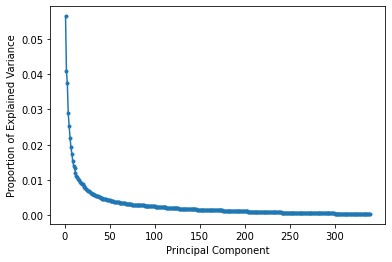

In [82]:
plt.plot(range(1,340), pca.explained_variance_ratio_[:339], marker='.')
plt.xticks(ticks = range(0, 340,50))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [80]:
acum = 0
for x in range (0,331,1):
  acum = acum + pca.explained_variance_ratio_[x]
acum

0.9502951572319145

In [83]:
pca = PCA(n_components = 331)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)
# ajustar regresión logística
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [84]:
print('Training accuracy:', logreg.score(X_train_pca, y_train))
print('Testing accuracy:', logreg.score(X_test_pca, y_test))

Training accuracy: 0.9348166666666666
Testing accuracy: 0.9265
